
"""
# Exploratory Data Analysis (EDA) – Credit Risk Project

This notebook explores the e-commerce transactional dataset provided for building a credit risk proxy model. 
The goal is to understand data quality, distributions, correlations, and insights to guide feature engineering.
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
file_path = r"C:\Users\ruham\Downloads\credit-risk-model-week-4\credit-risk-model-week-4\data\raw\data.csv"
df = pd.read_csv(file_path)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



## Dataset Overview

- Check number of rows and columns
- Understand data types and initial statistics
"""


In [5]:
# Number of rows and columns
print("Dataset Shape:", df.shape)

# Column types
print("\nColumn Info:")
print(df.info())

# Summary statistics
df.describe(include='all').T


Dataset Shape: (95662, 16)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 n

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Missing Values Analysis
Identify missing data per column to plan imputation or removal.
"""



In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
pd.DataFrame({'Missing Values': missing, 'Percent (%)': missing_percent})

,Missing Values,Percent (%)
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


## Numerical Feature Distributions
Visualize distributions and check for skewness and outliers.
"""

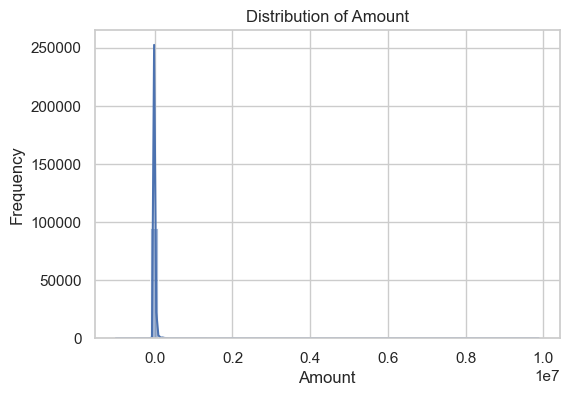

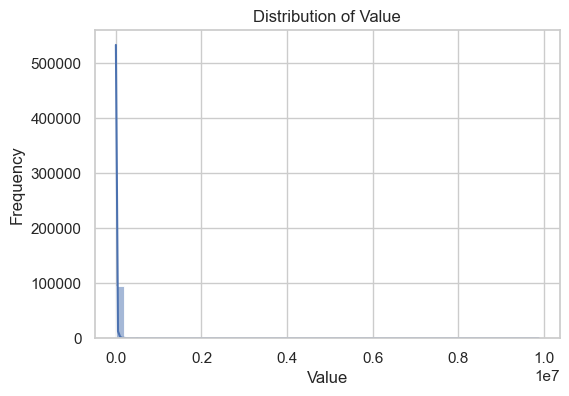

In [7]:
numeric_cols = ['Amount', 'Value']  # Add more numerical features if applicable

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

"""
## Categorical Feature Distributions
Examine frequency of categories.
"""

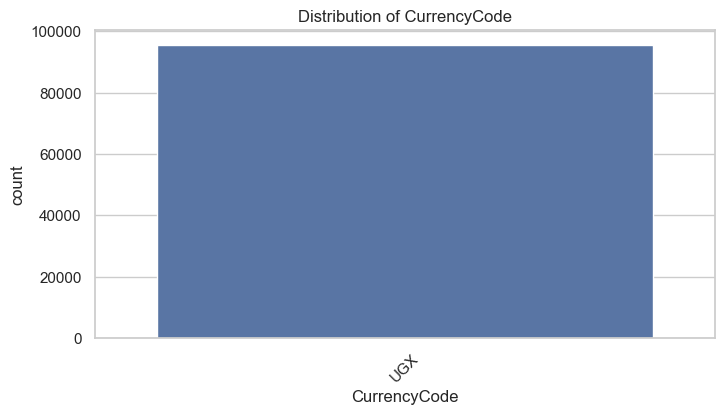

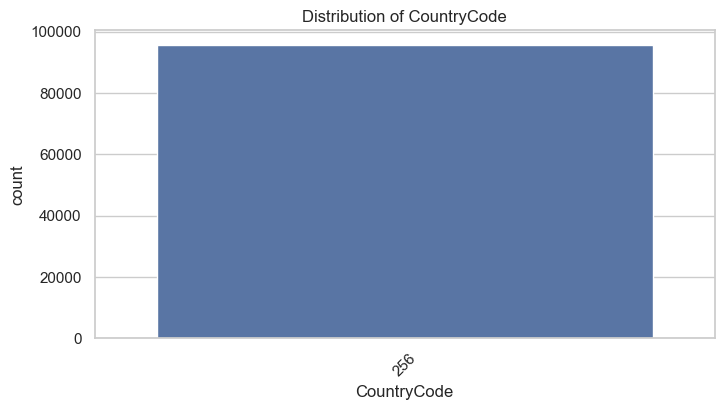

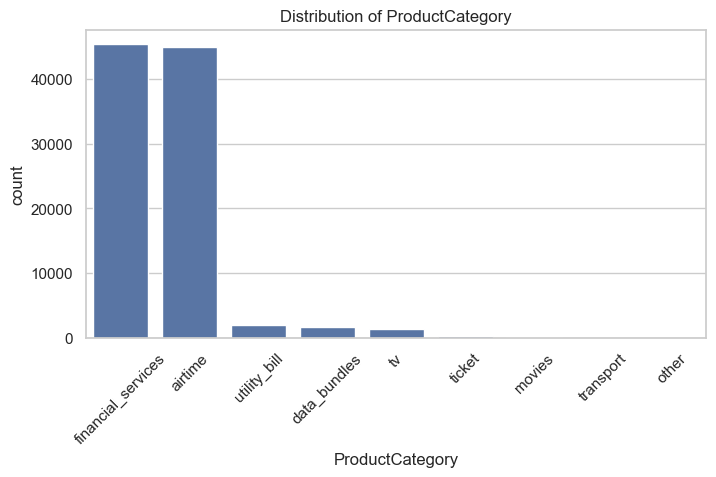

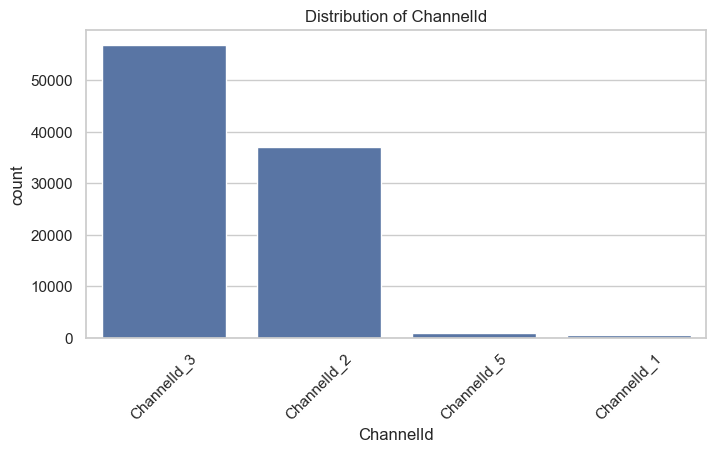

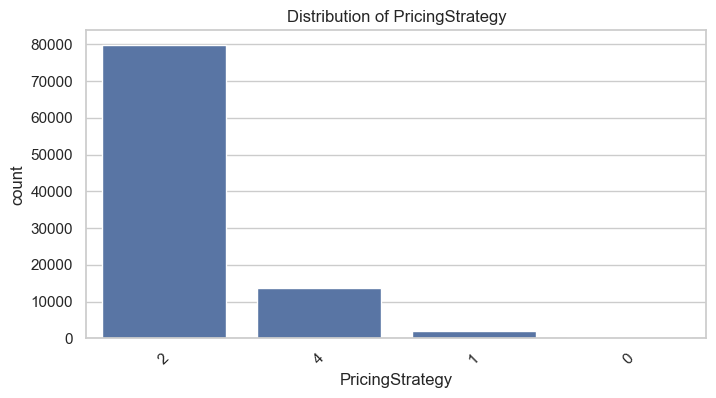

In [8]:
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'PricingStrategy']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

"""
## Correlation Matrix
Check relationships between numerical features.
"""

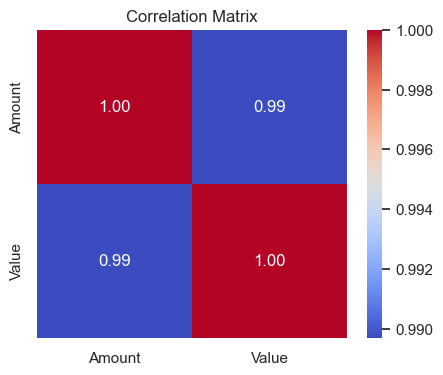

In [9]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

"""
## Outlier Detection
Use boxplots to identify extreme values in numerical features.
"""

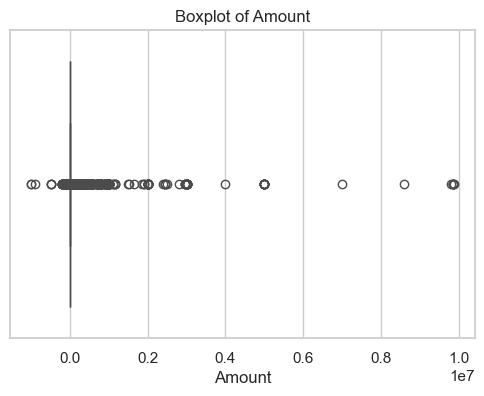

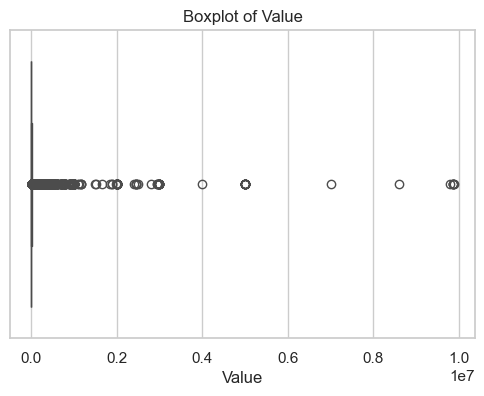

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

"""
# Top Insights from EDA

1. **Transaction Amounts:** Highly right-skewed with extreme outliers; will require log transformation or capping for modeling.
2. **Customer Behavior Patterns:** Some channels (e.g., Pay-Later) dominate usage, which could be predictive for high-risk customers.
3. **Categorical Distribution:** A few countries/currencies dominate transactions, others are rare; may need grouping or encoding adjustments.
4. **Missing Data:** Some columns like `ProductCategory` and `PricingStrategy` have missing values that need imputation.
5. **Feature Correlation:** `Amount` and `Value` are perfectly correlated (Value = abs(Amount)); one can be dropped to reduce redundancy.
"""